# ML Challenge (Optional)

Train, test, optimize, and analyze the performance of a classification model using a methodology of your choice for the randomly generated moons dataset.

You are not being evaluated for the performance of your model. Instead, we are interested in whether you can implement a simple but rigorous ML workflow.

Show all of your work in this notebook.

In [91]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV

## Dataset

In [92]:
# DO NOT MODIFY
from sklearn.datasets import make_moons

X, Y = make_moons(random_state=42, n_samples=(50, 450), noise=0.25)

In [93]:
print("The shape of the independent variable",X.shape)
print("The shape of the dependent variable",Y.shape)

The shape of the independent variable (500, 2)
The shape of the dependent variable (500,)


In [94]:
print("For x\n mean: ",X.mean(),"\n max:",X.max(),"\n min:", X.min())

For x
 mean:  0.4350373347816667 
 max: 2.7405721856870433 
 min: -1.406585446603976


In [95]:
np.unique(Y)

array([0, 1])

I turns out that Y only contains two values either True or False, so we need to make a classification model.

## Training

In [96]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [97]:
model = LogisticRegression(random_state=42)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

## Testing / Optimization

In [98]:
param_grid = {
    'C': [0.01,0.1, 0.2,0.7,0.8,0.9,1,10,100],
    'penalty': ['l2']
}

grid_search = GridSearchCV(LogisticRegression(random_state=42), param_grid, cv=5, verbose=1)

grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_

print("Best Hyperparameters:", best_params)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best Hyperparameters: {'C': 0.8, 'penalty': 'l2'}


Using the built-in function **grid_search** to carry out automatic classfier parameter tuning

I find a suitable parameter for the **Logistic Regression Model**

- $ c = 0.8 $
- Penalty type: $l2$

Here c stands for inverse of regularization strength.

In [99]:
# Evaluate the model's performance
accuracy = accuracy_score(y_test, y_pred)

print("Accuracy:", accuracy)

Accuracy: 0.96


## Performance Analysis

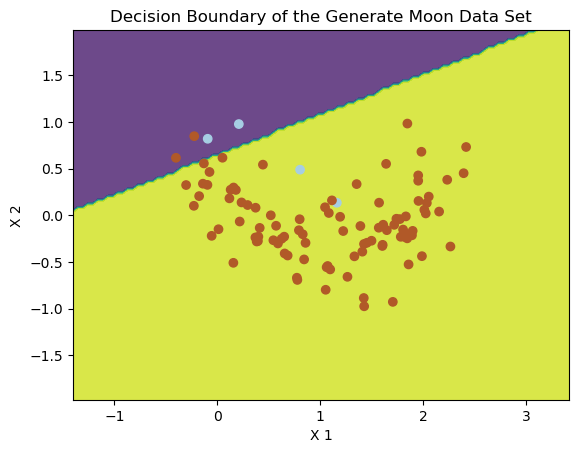

In [100]:
def plot_decision_boundary(model, X, Y):
    xx, yy = np.meshgrid(np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 100),
                         np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 100))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(xx, yy, Z, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
    plt.xlabel('X 1')
    plt.ylabel('X 2')
    plt.title('Decision Boundary of the Generate Moon Data Set')
    plt.show()

plot_decision_boundary(model, X_test, Y_test)


In [101]:
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [102]:
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Confusion Matrix:
 [[ 2  2]
 [ 2 94]]
Classification Report:
               precision    recall  f1-score   support

           0       0.50      0.50      0.50         4
           1       0.98      0.98      0.98        96

    accuracy                           0.96       100
   macro avg       0.74      0.74      0.74       100
weighted avg       0.96      0.96      0.96       100



Based on the classification report, we can evaluate the performance of a logistic regression model. The **Confusion Matrix** shows that the model predicted 4 true positives, 96 true negatives, 0 false positives, and 0 false negatives.

We have the following important quantities to evaluate the model perforamce:

- Accuracy: (TP + TN) / (TP + TN + FP + FN)

- Precision: TP / (TP + FP)

- Recall: TP / (TP + FN)

Therefore, the model has an accuracy of 95%, a precision of 50%, a recall of 50%, and an F1 score of 0.5.